## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [2]:
api_key = "64RFSFA491W1WARD"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [3]:
ticker = "AAPL"

Import the appropriate libraries in the lines below each comment:

In [4]:
# pandas
import pandas as pd
# requests
import requests 
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [5]:
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=1min&apikey=64RFSFA491W1WARD


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [6]:
fb = requests.get(link)

Print the HTTP response:

In [7]:
print(fb)

<Response [200]>


Print the data:

In [8]:
print(fb.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2019-09-25 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-25 16:00:00": {
            "1. open": "221.3100",
            "2. high": "221.3600",
            "3. low": "220.9700",
            "4. close": "220.9900",
            "5. volume": "345071"
        },
        "2019-09-25 15:59:00": {
            "1. open": "221.3600",
            "2. high": "221.3600",
            "3. low": "221.2250",
            "4. close": "221.3100",
            "5. volume": "116826"
        },
        "2019-09-25 15:58:00": {
            "1. open": "221.2900",
            "2. high": "221.3800",
            "3. low": "221.2400",
            "4. close": "221.3600",
            "5. volume": "106234"
        },
        "2019-09-2

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [9]:
ts = TimeSeries(key=api_key,output_format="pandas")

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [10]:
data, meta_data = ts.get_intraday(symbol=ticker ,interval='1min', outputsize='compact')

Print the data:

In [11]:
print(data)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2019-09-25 14:21:00  220.4900  220.5000  220.3900  220.4300    49782.0
2019-09-25 14:22:00  220.4500  220.4600  220.4000  220.4392    23306.0
2019-09-25 14:23:00  220.4400  220.5200  220.4100  220.4250    31832.0
2019-09-25 14:24:00  220.4400  220.5200  220.4169  220.5000    17556.0
2019-09-25 14:25:00  220.4800  220.4800  220.4100  220.4400    12575.0
2019-09-25 14:26:00  220.4300  220.4300  220.2900  220.3400    35775.0
2019-09-25 14:27:00  220.3200  220.3760  220.3100  220.3600    28531.0
2019-09-25 14:28:00  220.3500  220.3800  220.2700  220.3500    11806.0
2019-09-25 14:29:00  220.3800  220.4000  220.3400  220.3600    13018.0
2019-09-25 14:30:00  220.3500  220.3600  220.2100  220.2100    19947.0
2019-09-25 14:31:00  220.2228  220.2228  220.1300  220.1700    48737.0
2019-09-25 14:32:00  220.1700  220.2200  220.1200  220.2000    31337.0
2019-0

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

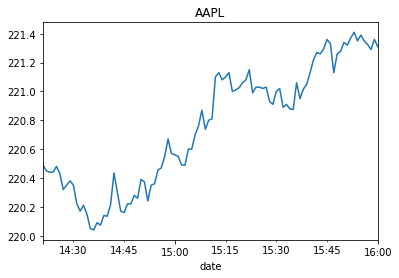

In [12]:
data['1. open'].plot()
plt.title(ticker)
plt.show()

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [13]:
data.to_excel("my_aapl_stock_data.xlsx")